## 뉴스 키워드 분석 (Naver API)

In [1]:
package_version(R.version) 

[1] '4.1.3'

### 자연어 처리
#### 절차

1) 수집
2) 전처리 (어휘분석, 불용어 처리, 형태소 분석)
3) 문서 표현 (VSM, Word Embedding, Documenet Embedding)
4) 차원 축소 (LSI, PCA, LDA)
5) 활용 (분류, 감성 분석, 정보 검색, 문서 요약, 챗봇, 기계 번역)
6) 평가 (혼동행렬, ROC, 정확도, 정밀도, 재현율, F1-Score)

- 불용어 : 불필요한 용어
- 형태소 분석 (Stemming) : 공통 어간을 가지는 단어를 묶는 작업을 Stemming
- 형태소 분석을 진행하기 위해 말뭉치 사전(Corpus) 필요, (SejongDic, NIADic)
- 정제된 텍스트 데이터는 n차원의 행렬로 구성 -> VSM(벡터 공간 모델), TVM(단어 벡터 모델) (Bag-of-words, N-gram, Ontology-based)
- 벡터 공간 모델의 차원을 축소 -> 분류(Document Classification), 감성 분석 (SNA)

In [3]:
library(rJava)
library(remote)
library(KoNLP)
library(httr)

#### 네이버 오픈 API 종류 : https://developers.naver.com/docs/common/openapiguide/apilist.md

In [4]:
URL = "https://openapi.naver.com/v1/search/news.json?"  # 네이버 뉴스 검색 API
cId <- "Mt8I_pQDaWDTGHwSd_pN" 
cSec <- "0BGjzmfDrz"
search = "황의조"

In [5]:
news = GET(url = URL,  # URL
           add_headers("X-Naver-Client-Id" = cId,
                       "X-Naver-Client-Secret" = cSec),
           query = list(query = search,  # 키워드
                        display = 100,  # 100개
                        start = 1,  # 검색 결과 몇 번째 페이지 부터 조회할지 결정
                        sort = "date"))  # 날짜순 정렬

In [6]:
httr::content(news)$total # 전체 뉴스 건수

[1] 67635

In [7]:
names(httr::content(news))

[1] "lastBuildDate" "total"         "start"         "display"      
[5] "items"

In [8]:
head(httr::content(news)$item)

[[1]]
[[1]]$title
[1] "이제는 영혼의 파트너! <b>황의조</b>-조규성, 이란 격파 선봉장으로"

[[1]]$originallink
[1] "https://sports.donga.com/article/all/20220315/112343355/2"

[[1]]$link
[1] "https://sports.news.naver.com/news.nhn?oid=382&aid=0000966725"

[[1]]$description
[1] "팀 조직이 탄탄하고 수비가 뛰어난 이란을 격파할 선봉에는 <b>황의조</b>(30·보르도)와 조규성(24·김천 상무)이... 월드컵 본선 체제로 전환을 앞둔 시점에서 아시아권에서 가장 강한 상대와 결전에 맞춰 <b>황의조</b>와 조규성을... "

[[1]]$pubDate
[1] "Wed, 16 Mar 2022 07:01:00 +0900"


[[2]]
[[2]]$title
[1] "'국대 발탁' 조규성, &quot;<b>황의조</b>는 내 우상, 골로 증명하겠다&quot;"

[[2]]$originallink
[1] "http://www.fourfourtwo.co.kr/news/articleView.html?idxno=11351"

[[2]]$link
[1] "https://sports.news.naver.com/news.nhn?oid=411&aid=0000007713"

[[2]]$description
[1] "조규성을 대신해 도쿄올림픽 와일드카드 공격수로 출전했던 <b>황의조</b>와도 아이러니하게 국가대표팀에서 만나며 경쟁자이자 좋은 선후배, 동료로서의 모습을 보이기도 했다. 조규성은 &quot;<b>황의조</b> 선수는 어렸을 때부터... "

[[2]]$pubDate
[1] "Wed, 16 Mar 2022 04:04:00 +0900"


[[3]]
[[3]]$title
[1] "메시 아버지, “바르셀로나와 메시 복귀 논의 중”"

[[3]]$originallink
[1] "http://www.osen.co.kr/article/G1111785625"

[[3]]$link
[1] "https://sports.news.naver.com/news.nhn?oid=109&aid=0004572689"

[[3]]$description
[1] "PSG는 13일 파리에서 열린 ‘2021-22 리그앙 28라운드’에서 <b>황의조</b>가 뛴 보르도를 3-0으로 이겼다. 승점 65점의 PSG는 여전히 압도적인 리그 선두다. 스리톱으로 나선 킬리안 음바페와 네이마르는 나란히 골맛을 봤다.... "

[[3]]$pubDate
[1] "Tue, 15 Mar 2022 23:09:00 +0900"


[[4]]
[[4]]$title
[1] "'물오른 활약상에 의욕 충만' 조규성, &quot;이란·UEA전 모두 득점 노리겠다&quot;"

[[4]]$originallink
[1] "https://www.goal.com/kr/뉴스/a/bltdb3c96378203de62"

[[4]]$link
[1] "https://sports.news.naver.com/news.nhn?oid=216&aid=0000120364"

[[4]]$description
[1] "조규성을 대신해 도쿄올림픽 와일드카드 공격수로 출전했던 <b>황의조</b>(29·지롱댕 드 보르도)와도 아이러니하게 국가대표팀에서 만나며 경쟁자이자 좋은 선후배, 동료로서의 모습을 보이기도 했다. 조규성은 &quot;<b>황의조</b>... "

[[4]]$pubDate
[1] "Tue, 15 Mar 2022 22:14:00 +0900"


[[5]]
[[5]]$title
[1] "'국가대표' 조규성-박지수-권창훈, &quot;수사불패 정신으로 임하겠다&quot;"

[[5]]$originallink
[1] "http://www.fourfourtwo.co.kr/news/articleView.html?idxno=11340"

[[5]]$link
[1] "https://sports.news.naver.com/news.nhn?oid=411&aid=0000007702"

[[5]]$description
[1] "이번에도 <b>황의조</b>와 함께 단 두 명의 공격수로 국가대표에 발탁되며 본인의 가치를 증명한 조규성은 &quot;대표팀 발탁은 언제나 영광스럽다. 매 순간 초심을 잃지 않고 팀과 함께 더 나아가도록 하겠다&quot;고 발탁 소감을... "

[[5]]$pubDate
[1] "Tue, 15 Mar 2022 20:27:00 +0900"


[[6]]
[[6]]$title
[1] "'보르도에게 대재앙'…몽펠리에, <b>황의조</b> 영입 고려"

[[6]]$originallink
[1] "http://www.mydaily.co.kr/new_yk/html/read.php?newsid=202203151905774364&ext=na&utm_campaign=naver_news&utm_source=naver&utm_medium=related_news"

[[6]]$link
[1] "https://sports.news.naver.com/news.nhn?oid=117&aid=0003584857"

[[6]]$description
[1] "프랑스 리그1의 몽펠리에가 <b>황의조</b> 영입을 고려하는 것으로 전해졌다. 프랑스 매체 지롱댕포에버는 15일(한국시간) 몽펠리에의 <b>황의조</b> 영입설을 전했다. <b>황의조</b>는 프랑스 리그1에서 두시즌 연속 10골 고지를 돌파한... "

[[6]]$pubDate
[1] "Tue, 15 Mar 2022 19:07:00 +0900"

 <br/>
 
 
### 첫 번쨰 페이지 부터 열 번쨰 페이지 까지 총 1000개 뉴스 수집

In [9]:
all_news = data.frame()
for(i in 1:10){
  param = list(query = search,
               display = 100,
               start = i, # 첫 번쨰 페이지 부터 열 번쨰 페이지 까지 총 1000개
               sort = "date")
  news = GET(url = URL,
             add_headers("X-Naver-Client-Id" = cId,
                         "X-Naver-Client-Secret" = cSec),
             query = param)
  body = data.frame(t(sapply(httr::content(news)$item, data.frame)))
  all_news = rbind(all_news, body)
  Sys.sleep(0.1)
}
dim(all_news)

[1] 1000    5

In [10]:
all_news[1,1]

[[1]]
[1] "이제는 영혼의 파트너! <b>황의조</b>-조규성, 이란 격파 선봉장으로"

In [11]:
names(all_news)

[1] "title"        "originallink" "link"         "description"  "pubDate"

In [12]:
all_news$title[1:10]

[[1]]
[1] "이제는 영혼의 파트너! <b>황의조</b>-조규성, 이란 격파 선봉장으로"

[[2]]
[1] "'국대 발탁' 조규성, &quot;<b>황의조</b>는 내 우상, 골로 증명하겠다&quot;"

[[3]]
[1] "메시 아버지, “바르셀로나와 메시 복귀 논의 중”"

[[4]]
[1] "'물오른 활약상에 의욕 충만' 조규성, &quot;이란·UEA전 모두 득점 노리겠다&quot;"

[[5]]
[1] "'국가대표' 조규성-박지수-권창훈, &quot;수사불패 정신으로 임하겠다&quot;"

[[6]]
[1] "'보르도에게 대재앙'…몽펠리에, <b>황의조</b> 영입 고려"

[[7]]
[1] "조규성이 밝힌 꾸준한 대표팀 승선 배경… “자신감과 웨이트”"

[[8]]
[1] "'서울E 최초 국대 발탁' 이재익, &quot;구단 역사에 한 획, 들뜨지 않을게요&quot;"

[[9]]
[1] "[김남구의 유럽통신] 보르도 감독, “<b>황의조</b>, 개선할 미세한 부분 많아”"

[[10]]
[1] "원점으로 돌아간 벤투호…원톱은 누가 될까?"



### 텍스트 전처리
- gsub("[\r\n\t]", ' ', news) : 이스케이프 제거
- gsub('[[:punct:]]', ' ', news_pre) : 문장부호 제거
- gsub('[[:cntrl:]]', ' ', news_pre) : 특수문자 제거
- gsub('\\\\d+', ' ', news_pre) : 숫자 제거  
- gsub('[a-z]+', ' ', news_pre) : 영 대문자 제거
- gsub('[A-Z]+', ' ', news_pre) : 영 소문자 제거
- gsub('\\\\s+', ' ', news_pre) : 2개 이상 공백 교체

In [13]:
pat = "<b>|</b>|&quot;|Q&amp;A" ; rep = " "
title = gsub(pattern = pat, replacement = rep, x = all_news$title)
title <- gsub('[[:punct:]]', replacement = rep, title) 
title <- gsub("개월", replacement = rep, title)
title <- gsub("UEA", replacement = "UAE", title)
title <- gsub('[[:cntrl:]]', replacement = rep, title) 
title <- gsub('\\d+', replacement = rep, title)
head(title, 10)

[1] "이제는 영혼의 파트너   황의조  조규성  이란 격파 선봉장으로"         
 [2] " 국대 발탁  조규성    황의조 는 내 우상  골로 증명하겠다 "           
 [3] "메시 아버지   바르셀로나와 메시 복귀 논의 중 "                       
 [4] " 물오른 활약상에 의욕 충만  조규성   이란 UAE전 모두 득점 노리겠다 " 
 [5] " 국가대표  조규성 박지수 권창훈   수사불패 정신으로 임하겠다 "       
 [6] " 보르도에게 대재앙  몽펠리에   황의조  영입 고려"                    
 [7] "조규성이 밝힌 꾸준한 대표팀 승선 배경   자신감과 웨이트 "            
 [8] " 서울E 최초 국대 발탁  이재익   구단 역사에 한 획  들뜨지 않을게요 " 
 [9] " 김남구의 유럽통신  보르도 감독    황의조   개선할 미세한 부분 많아 "
[10] "원점으로 돌아간 벤투호 원톱은 누가 될까 "

<br/>


### 사전 설정
(SejongDic, NIADic)

In [14]:
useNIADic()  # useSejongDic()

Backup was just finished!
1213109 words dictionary was built.


#### 명사 추출

In [15]:
noun_list = extractNoun(title); head(noun_list)

[[1]]
[1] "영혼"   "파트너" "황의조" "조규"   "성"     "이란"   "격파"   "선봉장"
[9] "로"    

[[2]]
[1] "국대"     "발탁"     "조규"     "성"       "황의조"   "내"       "우상"    
[8] "증명하겠"

[[3]]
[1] "메시"       "아버지"     "바르셀로나" "메시"       "복귀"      
[6] "논"         "중"        

[[4]]
 [1] "활약상" "의욕"   "충만"   "조규"   "성"     "이란"   "UAE"    "전"    
 [9] "득점"   "노리겠"

[[5]]
[1] "국가대표" "조규"     "성"       "박지수"   "권창훈"   "수사"     "불패"    
[8] "정신"     "임하겠"  

[[6]]
[1] "보르도"   "대재앙"   "몽펠리에" "황의조"   "영입"     "려"

In [16]:
tail(noun_list)

[[1]]
[1] "메시"     "네이마르" "야유"     "PSG"      "DF"       "야유"     "이해"    
[8] "한"      

[[2]]
[1] "수원FC" "박민규" "벤투호" "첫"     "발"    

[[3]]
[1] "손흥민" "지원사" "격"     "K"      "리거"   "들"     "맡겼"  

[[4]]
 [1] "유럽파"     "황의조"     "vs"         "상승세"     "조규"      
 [6] "성"         "국대"       "스트라이커" "경쟁"       "파"        

[[5]]
 [1] "벤투호" "손흥민" "황희"   "찬"     "등"     "해외파" "호출"   "이란"  
 [9] "전"     "최정예" "명단"   "공"     "개"    

[[6]]
 [1] "리그"   "G"      "골"     "폭발"   "벤투호" "승선"   "조규"   "성"    
 [9] "팀"     "짐"



#### 사전에 단어 추가

In [17]:
term <- c("조규성", "벤투호", "바르셀로나", "K리거", "K-리거", "이강인", 
          "황희찬", "이란", "UAE", "바르셀로나", "GK", "DF", "MF", "FW", 
          "해외파", "공개", "지원사격", "공격수", "골키퍼", "미드필더", "수비수", "코치", "팬들", "효민",
         "의욕충만", "의욕 충만", "선발", "증명하겠다", "노리겠다", "임하겠다", "서울E", "선봉장", "티아라")
userDic <- data.frame(term = term, tag = "ncn")

In [18]:
buildDictionary(ext_dic = c("NIADic", "woorimalsam", "insighter", "sejong"),
                user_dic = userDic,
                replace_usr_dic = T)

1070053 words dictionary was built.




#### 사전에 단어 추가 후 다시 명사 추출

In [19]:
noun_list = extractNoun(title); head(noun_list)

[[1]]
[1] "영혼"   "파트너" "황의조" "조규성" "이란"   "격파"   "선봉장" "로"    

[[2]]
[1] "국대"     "발탁"     "조규성"   "황의조"   "내"       "우상"     "증명하겠"

[[3]]
[1] "메시"       "아버지"     "바르셀로나" "메시"       "복귀"      
[6] "논"         "중"        

[[4]]
[1] "활약상" "의욕"   "충만"   "조규성" "이란"   "UAE"    "전"     "득점"  
[9] "노리겠"

[[5]]
[1] "국가대표" "조규성"   "박지수"   "권창훈"   "수사"     "불패"     "정신"    
[8] "임하겠"  

[[6]]
[1] "보르도"   "대재앙"   "몽펠리에" "황의조"   "영입"     "려"

In [20]:
tail(noun_list)

[[1]]
[1] "메시"     "네이마르" "야유"     "PSG"      "팬들"     "DF"       "야유"    
[8] "이해"     "한"      

[[2]]
[1] "수원FC" "박민규" "벤투호" "첫"     "발"    

[[3]]
[1] "손흥민"   "지원사격" "K"        "리거"     "들"       "맡겼"    

[[4]]
[1] "유럽파"     "황의조"     "vs"         "상승세"     "조규성"    
[6] "국대"       "스트라이커" "경쟁"       "파"        

[[5]]
 [1] "벤투호" "손흥민" "황희찬" "등"     "해외파" "호출"   "이란"   "전"    
 [9] "최정예" "명단"   "공"     "개"    

[[6]]
[1] "리그"   "G"      "골"     "폭발"   "벤투호" "승선"   "조규성" "팀"    
[9] "짐"



#### BoW추출을 위해 명사가 몇 번 등장했는지 확인 (빈도수 테이블)

In [21]:
tb_noun = table(unlist(noun_list))
length(tb_noun)

[1] 366

In [22]:
df_noun = data.frame(tb_noun)
(head(df_noun))

,Var1,Freq
,<fct>,<int>
1,A,40
2,DF,6
3,G,1
4,K,14
5,N,20
6,PSG,36


In [23]:
df_noun$Var1 <- as.character(df_noun$Var1)
df_noun <- df_noun[nchar(df_noun$Var1) > 1, ]

In [25]:
library(dplyr)

In [26]:
df_noun <- df_noun %>% arrange(desc(df_noun$Freq))

### "황의조"와 관련된 Top10 키워드

In [32]:
(top10_noun <- head(df_noun, 10))

,Var1,Freq
,<chr>,<int>
1,벤투호,347
2,이란,296
3,조규성,233
4,황의조,212
5,손흥민,186
6,김천,130
7,상무,110
8,황희찬,102
9,발탁,100


<br/>

### 시각화
- 두 글자 이상인 것 들에 대해서만 시각화

In [29]:
library(ggplot2)
library(showtext)

In [30]:
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

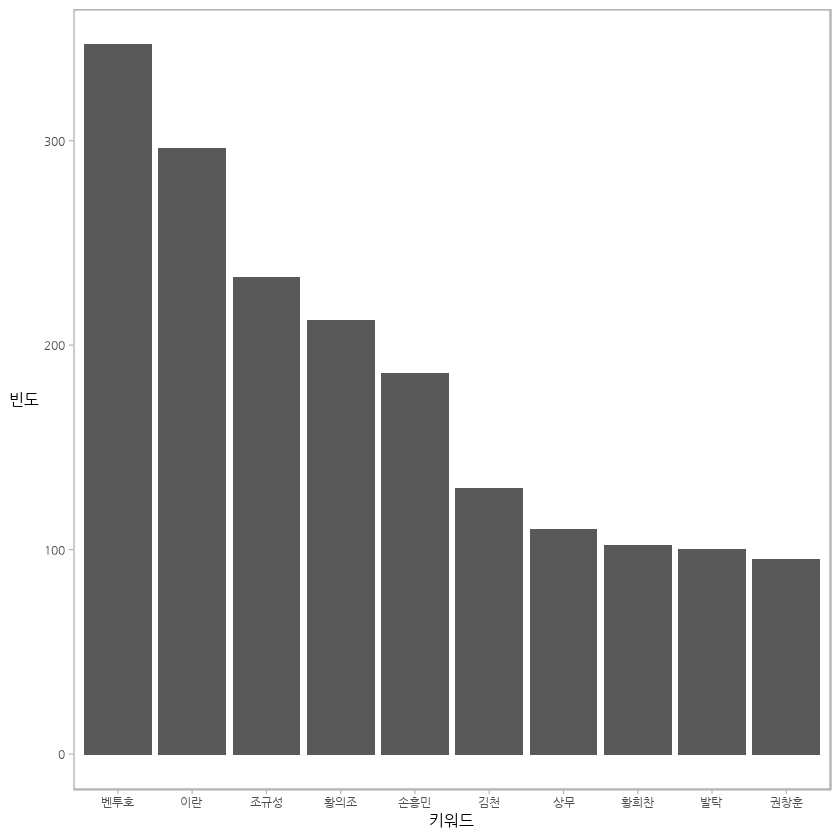

In [56]:
ggplot(top10_noun) +
  geom_bar(aes(x = reorder(Var1, -Freq), y = Freq), stat = "identity") +
xlab("키워드") + 
ylab("빈도") + 
theme_light(base_family = "nanum") +
theme(axis.title = element_text(size = 12),
      axis.title.y = element_text(angle = 0, 
                                  vjust = 0.5),
      panel.background = element_blank(),
      panel.grid = element_blank())

<br/>

### 워드클라우드

In [78]:
library(wordcloud2)
library(htmlwidgets)
library(tidyverse)
library(nord)
library(jsonlite)
library(yaml)
library(base64enc)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)

#### wordcloud 기본 시각화
- word : 단어
- freq : 단어들의 빈도
- size : 가장빈도가 큰 단어와 빈도가 가장 작은 단어 폰트 사이의 크기 차이
- min.freq : 출력될 단어의 최소 빈도
- max.word : 출력될 단어들의 최대개수
- random.order : TRUE 이면 램덤으로 단어출력, FALSE 이면 빈도수가 큰 단어일수록 중앙에 배치
- random.color : TRUE 이면 단어색은 랜덤순으로 정해지고, FALSE이면 빈도순으로 정해짐
- rot.per : 90도로 회전된 각도로 출력되는 단어의 비율
- colors : 가장 작은 빈도부터 큰 빈도까지의 단어색

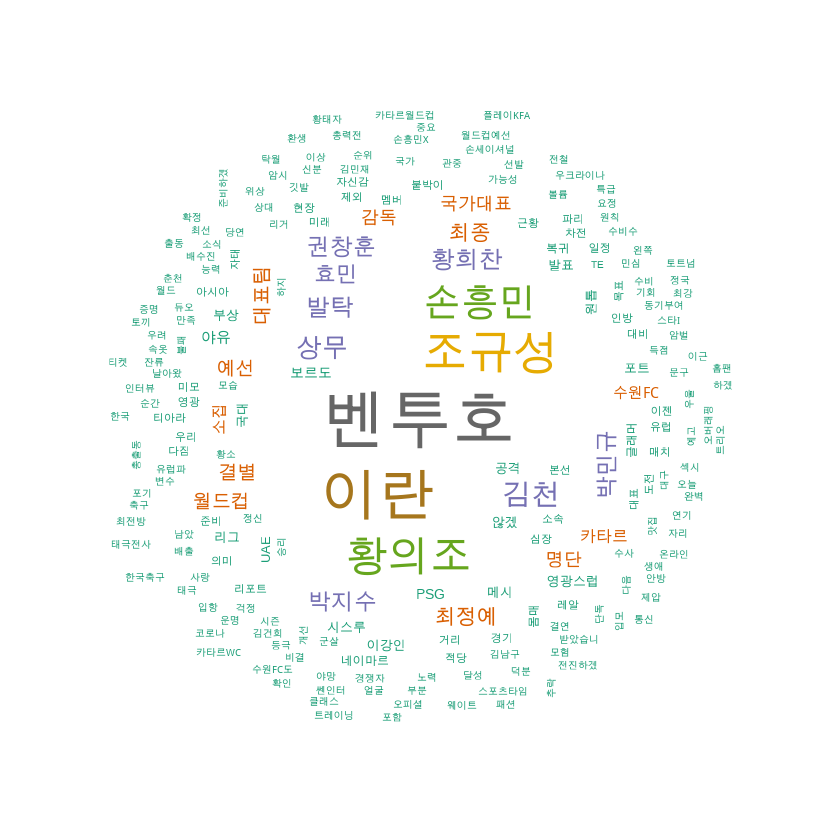

In [79]:
wordcloud(words = df_noun$Var1, 
          freq = df_noun$Freq,
          random.order = F, 
          min.freq = 10,  
          colors = brewer.pal(8, "Dark2"))

<br/>

#### wordcloud2 
- data : 단어(word)와 빈도(freq) 컬럼을 갖는 데이터프레임
- size : 폰트 사이즈
- minSize : 서브타이틀 문자열
- gridSize : 그리드 사이즈
- fontFamily : 폰트 지정
- fontWeight : 폰트 볼드체 여부 지정 가능 (normal / bold / 600)
- color : 텍스트 색상 팔레트 (random-dark / random-light / 기타 컬러 벡터)
- backgroundColor : 배경 색 지정
- minRotation : 워드클라우드의 단어들을 회전시키려는 경우, 최소 회전각(rad 단위 입력) (* default : -pi/4)
- maxRotation : 워드클라우드의 단어들을 회전시키려는 경우, 최대 회전각(rad 단위 입력) (* default : pi/4)
- shuffle : (TRUE : 같은 데이터프레임이 주어져도 워드클라우드를 그릴 때마다 다른 결과값 표시)
- rotateRatio : 단어의 회전 확률 조절
- shape : 워드클라우드 형태(도형) 결정 (circle / cardioid / diamond / triangle-forward / triangle / pentagon / star)
- ellipticity : 워드클라우드 셰이프의 평평한 정도
- widgetsize  : 위젯 사이즈
- figPath  : 형태를 이미지 마스크로 지정할 경우, 해당 이미지의 경로와 파일명

In [99]:
wordcloud2(data = df_noun,
           color = "random-light",
           backgroundColor='#F7ECEA',
           shape = "star",
           fontFamily = "맑은고딕",
           fontWeight = 200,
           size = 1,
           widgetsize = c(900, 600))

HTML widgets cannot be represented in plain text (need html)

<br/>

#### 이미지 모양대로 wordcloud 생성

HTML widgets cannot be represented in plain text (need html)
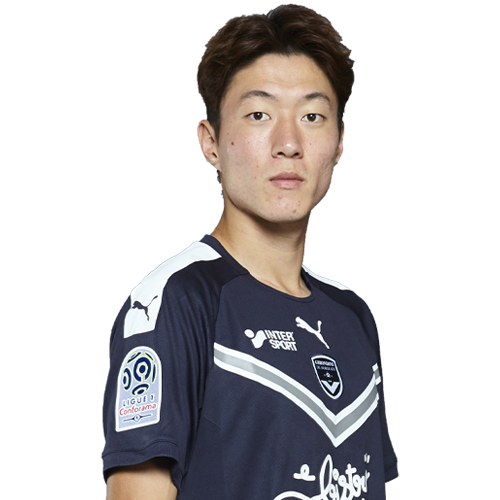

In [110]:
wordcloud2(df_noun, figPath = "C:/rp/uijo.png")  

<br/>

#### 글씨 모양대로 wordcloud 생성

HTML widgets cannot be represented in plain text (need html)
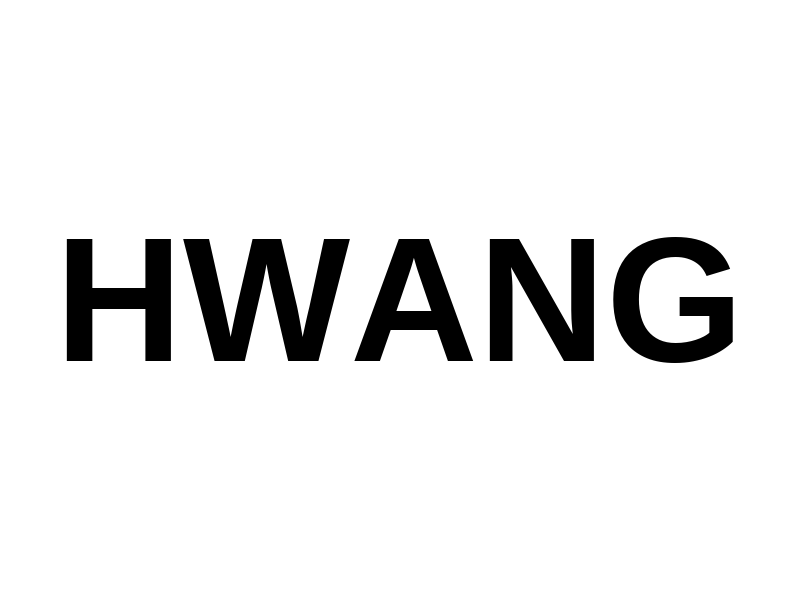

In [111]:
letterCloud(df_noun, word = "HWANG", size = 1)

<br/>

<br/>

### 뉴스 그래프 분석

In [177]:
URL = "https://openapi.naver.com/v1/search/news.json?"
search = "황희찬"

all_news = data.frame()
for(i in 1:100){
   param = list(query = search,
                display = 100,
                start = i,
                sort = "sim")
   news = GET(url = URL,
              add_headers("X-Naver-Client-Id" = cId,
                          "X-Naver-Client-Secret" = cSec),
              query = param)
   body = data.frame(t(sapply(httr::content(news)$item,
                              data.frame)))
        
   all_news = rbind(all_news, body)
   Sys.sleep(0.1)
}

In [178]:
names(all_news)

[1] "title"        "originallink" "link"         "description"  "pubDate"

In [179]:
head(all_news$pubDate)

[[1]]
[1] "Mon, 14 Mar 2022 06:59:00 +0900"

[[2]]
[1] "Wed, 16 Mar 2022 06:45:00 +0900"

[[3]]
[1] "Mon, 14 Mar 2022 07:33:00 +0900"

[[4]]
[1] "Mon, 14 Mar 2022 15:42:00 +0900"

[[5]]
[1] "Mon, 14 Mar 2022 01:43:00 +0900"

[[6]]
[1] "Mon, 14 Mar 2022 11:30:00 +0900"

In [180]:
all_news$pubDate = as.Date(unlist(all_news$pubDate), "%a, %d %b %Y")

In [181]:
head(all_news$pubDate)

[1] "2022-03-14" "2022-03-16" "2022-03-14" "2022-03-14" "2022-03-14"
[6] "2022-03-14"

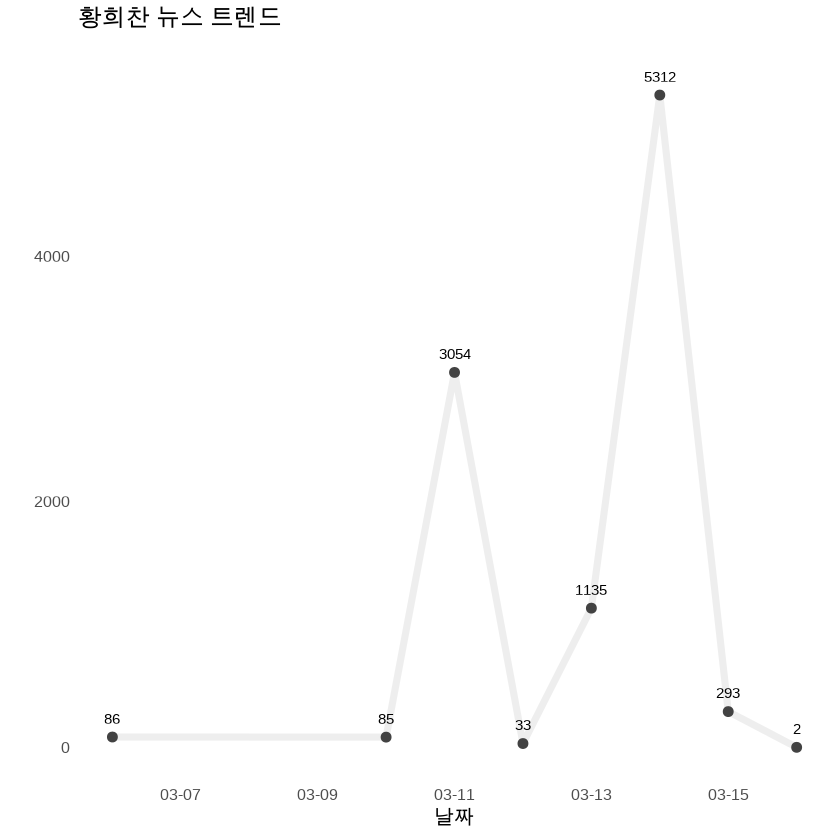

In [182]:
ggplot(all_news, aes(x = pubDate)) +
   geom_line(stat = "count", color = "#EEEEEE", size = 1.5) + 
   geom_point(stat = "count", color = "#424242", size = 2) +
   geom_text(aes(label = ..count..),
             stat = "count",
             position = position_nudge(y = 150)) +
   labs(title = "황희찬 뉴스 트렌드") +
   xlab("날짜") +
   ylab("") +
   scale_x_date(date_labels = "%m-%d") +
   theme(text = element_text(size = 15),
         panel.background = element_blank(),
         axis.ticks = element_blank())

In [195]:
pat = "<b>|</b>|&quot;|Q&amp;A" ; rep = " "
all_news$title = gsub(pattern = pat, replacement = rep, x = all_news$title)
all_news$title <- gsub('[[:punct:]]', replacement = rep, x = all_news$title) 
all_news$title <- gsub("개월", replacement = rep, x = all_news$title)
all_news$title <- gsub("UEA", replacement = "UAE", x = all_news$title)
all_news$title <- gsub('[[:cntrl:]]', replacement = rep, x = all_news$title) 
all_news$title <- gsub('\\d+', replacement = rep, x = all_news$title)

In [196]:
class(all_news$title)

[1] "character"

In [197]:
top <- data.frame(1:10)
for(i in 1:length(unique(all_news$pubDate))) {
   sub_news = all_news[all_news$pubDate == sort(unique(all_news$pubDate))[i],]  
   df_target = data.frame(table(unlist(strsplit(sub_news$title, " "))))
   df_target = df_target[order(df_target$Freq, decreasing = TRUE),]
   df_target$Var1 = as.character(df_target$Var1)
   df_target = df_target[nchar(df_target$Var1) > 1 & nchar(df_target$Var1) < 7, ]
   
   top10 = head(df_target, 10)
   if (length(top10) < 10) {
      dif <- nrow(top) - nrow(top10)
      top10 <- data.frame(Var1 <- c(top10$Var1, rep(NA, dif)), Freq <- c(top10$Freq, rep(NA, dif)))
      colnames(top10) = c("Var1", "Freq")
   }
   top <- cbind(top, top10)
}

In [198]:
top <- t(top)
top <- top[-1, ]
nrow(top)

[1] 16

In [199]:
key <- matrix(nrow = length(unique(all_news$pubDate)), ncol = 10)
for (i in 1:nrow(top)) {
   if (i%%2 == 1) {
      k <- i/2 + 1
      key[k,] <- top[i,]
   }
}
rownames(key) <- as.character(unique(all_news$pubDate))
colnames(key) <- paste(c(1:10), "위")

In [200]:
key

,1 위,2 위,3 위,4 위,5 위,6 위,7 위,8 위,9 위,10 위
2022-03-14,연패,황희찬,풀타임,수렁,부상,울버햄프턴은,회복,울버햄프턴,만에,울버햄튼
2022-03-16,황희찬,상대로,시즌,호골,넣은,다시,데뷔골,돌아온,왓퍼드,웃을까
2022-03-15,황희찬,도움,연패,탈출,EPL,울버햄프턴,울버햄튼,리그,왓퍼드,대승
2022-03-13,같았다,극찬,동료,득점,왓포드전,칸토나,황희찬,NA,NA,NA
2022-03-11,황희찬,교체,부상,전반,아웃,선발,충돌,에버턴,만에,부상으로
2022-03-10,황희찬,부상,벤투호,손흥민,교체,명단,울버햄튼,만에,발탁,복귀
2022-03-06,황희찬,손흥민,이란,뚫는다,춘천듀오,만에,감독은,모르겠다,울브스,재부상
2022-03-12,교체된,대표팀,문제,부상,소속팀서,없을까,합류는,황희찬,NA,NA
